In [2]:
#data processing 
import pandas as pd
import numpy as np
#visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
#reading in data
df = pd.read_csv("C:/Users/17326/OneDrive - go.Stockton.edu/Documents/dssa/fetal_health.csv")

In [4]:
#overview of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.drop(df.columns[10:20], axis=1, inplace=True) #dropping histogram values to see how the model is impacted

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
X = df.drop(["fetal_health"], axis= 1) #defining x
y = df["fetal_health"] #defining target variable 

In [8]:
#Stanadrdizing the data
col_names = list(X.columns)
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled, columns = col_names)

In [9]:
#splitting into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size =0.2, random_state=42) #80/20 training test split

In [10]:
#creating a logistic regression model & fitting the training data
logreg_model = LogisticRegression(max_iter=1000, multi_class= 'multinomial')
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [11]:
#making predictions on the test set
y_pred = logreg_model.predict(X_test)

In [12]:
#evaluate model's performance

accuracy = accuracy_score(y_test, y_pred)
classificiation = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#print results
print("Accuracy: ", accuracy)
print("Classification Report:\n", classificiation)
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  0.8661971830985915
Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.93      0.93       333
         2.0       0.65      0.62      0.63        64
         3.0       0.65      0.69      0.67        29

    accuracy                           0.87       426
   macro avg       0.74      0.75      0.74       426
weighted avg       0.87      0.87      0.87       426

Confusion Matrix:
 [[309  16   8]
 [ 21  40   3]
 [  3   6  20]]


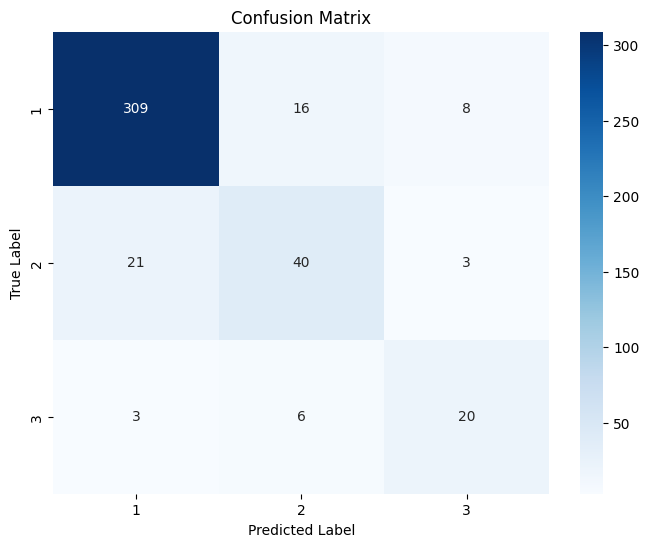

In [13]:
#visual of log reg confusion matrix

plt.figure(figsize=(8,6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3], yticklabels=[1,2,3])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel('True Label')
plt.show()